In [49]:
# Import 

import numpy as np
# - `numpy` is imported to handle numerical computations, particularly for arrays

import matplotlib.pyplot as plt
# - `matplotlib.pyplot` is used for creating visualizations for 
#    understanding data distribution and model performance.


In [51]:
# 1) Implementing Data 

data = np.array([
    [12, 2, 0], [20, 6, 0], [35, 4, 1], [50, 8, 1],
    [15, 3, 0], [45, 10, 1]])
# - Dataset is loaded into a NumPy array so it can be manipulated

X = data[:, :2]  
y = data[:, 2] 
# - `X` gets the first two columns (features)
# - `y` gets the third column (target variable)

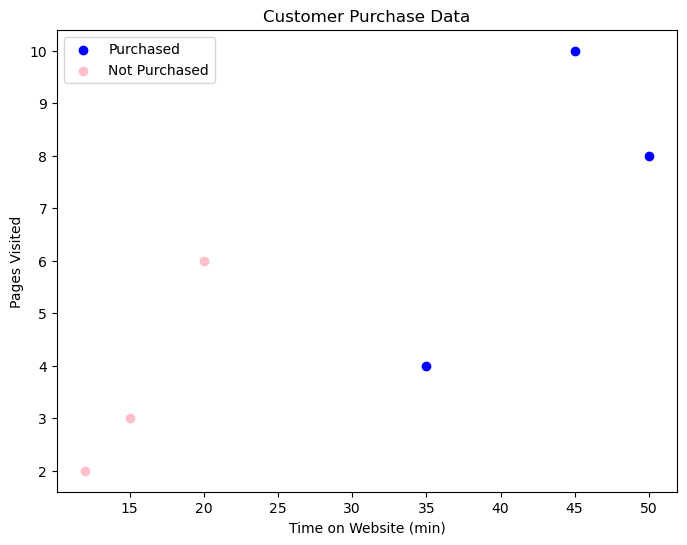

In [72]:
# Visualizing Data 

plt.figure(figsize=(8, 6))
pos = y == 1
neg = y == 0

plt.scatter(X[pos, 0], X[pos, 1], c='blue', label='Purchased')
plt.scatter(X[neg, 0], X[neg, 1], c='pink', label='Not Purchased')
plt.xlabel('Time on Website (min)')
plt.ylabel('Pages Visited')
plt.legend()
plt.title('Customer Purchase Data')
plt.show()

# - Generates a scatter plot that visualizes the relationship between 
#   time spent on the website and number of pages visited
# - Shows whether customers purchased (blue) or did not(pink)

In [76]:
# Purchased Customers (Blue Points):
# - Points generally clustered toward the top right corner
# - Meaning customers who spent more time and visited more 
#   pages were more likely to purchase

# Not Purchased Customers (Pink Points): 
# - Points generally in the bottom-left corner
# - Customers with shorter visit times and fewer pages 
#   visited were less likely to buy

# - Could be outliers like a customer spending moderate time 
#   with little pages visited but still purchased or the opp.

In [55]:
# 2) Implementing Sigmoid Function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test the sigmoid function
z = np.array([0, 2, -1])
print("Sigmoid:", sigmoid(z))

# - The sigmoid function converts linear combos of inputs into 
#   probabilities

# Sigmoid(0) = 0.5
# - the model predicts 50% probability showing uncertainty about the outcome
# Sigmoid(2) = 0.88079708
# - indicates high probability of customer purchased 
# Sigmoid(-1) = 0.26894142
# - indicates low probability of customer purchased 

# When z is very large its positive, e^(-z) approaches 0, then sigmoid 
# output close to 1. When z is very small (negative), e^(-z) becomes  
# very large, making the sigmoid output is close to 0. 
# The sigmoid function asymptotically approaches 1 for large z and 0 
# for small z. The curve flattens approaching infinity or neg infinity
# leading to very small gradient values

Sigmoid: [0.5        0.88079708 0.26894142]


In [57]:
# 3) Implementing Compute Cost Function 

def compute_cost(X, y, w, b):
    m = len(y)
    cost = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
    return cost / m

w = np.zeros(2)
b = 0
cost = compute_cost(X, y, w, b)
print("Initial Cost:", cost)

# - The cost function measures how well the model’s predictions 
#   match the results of purchased vs. no purchased
# - measures how far off the model’s predictions are
# - higher cost means worse lower cost is better model performance
# - Based on the initial cost of 0.6931471805599453 it is clear the 
#   model has not learned anything yet and making random guesses 
# - We want to train this model to bring the value down 

# When the weights are initialized to 0, the model predicts a probability
# of 0.5 for all examples since sigmoid(0) = 0.5. This leads to a high initial 
# cost roughly 0.693 for binary classification. This happens because the model
# hasnt learned any relationship between the features and the target variable, 
# so it makes random guesses.
# When predictions are far from actual values, the cost increases, pushing the 
# model to adjust weights and bias for better accuracy.

Initial Cost: 0.6931471805599453


In [59]:
# 3) Implementing Gradient Descent Function 

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    m = len(y)
    w = w_in.copy()
    b = b_in

    for i in range(num_iters):
        dj_dw = np.zeros(X.shape[1])
        dj_db = 0

        for j in range(m):
            z = np.dot(X[j], w) + b
            f_wb = sigmoid(z)
            err = f_wb - y[j]
            dj_dw += err * X[j]
            dj_db += err

        w -= alpha * dj_dw / m
        b -= alpha * dj_db / m

    return w, b
    
# - loop updates the weights and bias by calculating the prediction error for 
#   each training example, computing the gradients, and adjusting the parameters 
# - Gradient descent is a iterative process that updates model  
#   parameters to minimize prediction error
# - alpha too high leads to instability, too low slows convergence.
# - each update makes the model more accurate over time

# During gradient descent, the weights and bias are updated by subtracting the
# alpha(learning rate) multiplied by the gradients, shifting values to  
# reduce the cost. If the a is too large, the model diverges. 
# If α is too small, convergences takes longer.

In [61]:
# Train Model 

iterations = 1000
alpha = 0.01
w_final, b_final = gradient_descent(X, y, w, b, alpha, iterations)
print(f"Final weights: {w_final}, Final bias: {b_final}")

# - Runs gradient descent for 1000 iterations 
# - Learning rate = .01 (how large parameter updates) 
# - minimizes the cost function and improve the model’s predictability

# 0.219 = time spent on website
# shows that as time on the website increases, probability of purchase increases
# 0.744 = number of pages visited
# shows that as # of pgs increases, probability of purchase decreases
# -1.42 = bias 
# Lowers the base probability of purchase

Final weights: [ 0.21883731 -0.74428752], Final bias: -1.422071305711537


In [63]:
# 5) Implementing Regularization

def compute_cost_regularized(X, y, w, b, lambda_):
    m = len(y)
    cost = compute_cost(X, y, w, b)
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    return cost + reg_cost

lambda_ = 0.1
reg_cost = compute_cost_regularized(X, y, w, b, lambda_)
print("Regularized Cost:", reg_cost)

# - Implementing Regularization reduces overfitting by penalizing large weights
# - the higher the lambda, the stronger the penalty 
# - This function improves generalization, and doesnt sacrafice accuracy 

# - Regularized Cost≈ Initial Cost
# - No penalty is added since the weights are initially zero 
# - Regularization only impacts cost only when weights grow in training the model

# Regularization prevents overfitting by penalizing large weights. Increasing lambda 
# reduces overfitting but too large of a lambda can also cause underfitting.


Regularized Cost: 0.6931471805599453


In [65]:
# Experimenting with α and λ

alphas = [0.001, 0.01, 0.1]
lambdas = [0, 0.01, 0.1]

for alpha in alphas:
    for lambda_ in lambdas:
        w_final, b_final = gradient_descent(X, y, w, b, alpha, 1000)
        cost_reg = compute_cost_regularized(X, y, w_final, b_final, lambda_)
        print(f"Alpha: {alpha}, Lambda: {lambda_}, Regularized Cost: {cost_reg}")

# - this for loop tests different combinations of the learning rate (alpha) and 
#   regularization strength (lambda) to see how they affect the model’s 
#   performance and the regularized cost

# Smaller alpha has slow convergence, need more iterations for the cost to decrease.
# Larger αlpha has fast convergence but can cause the cost to diverge if too big.
# Smaller lambda lets model fit data closely but can lead to overfitting.
# Larger lamda reduces overfitting but can cause underfitting making cost higher.
# Moderate alpha and lamda leads to fastest and stable convergence with lowest cost.

# Best combinations based on outputs: 
# Alpha = 0.1, Lamda = 0 
# - Achieves the lowest cost but may risk overfitting
# Alpha = 0.1, Lamda = 0.1
# - Slightly higher cost but most likely better for generalization

Alpha: 0.001, Lambda: 0, Regularized Cost: 0.5000528070769931
Alpha: 0.001, Lambda: 0.01, Regularized Cost: 0.500110129763024
Alpha: 0.001, Lambda: 0.1, Regularized Cost: 0.500626033937303
Alpha: 0.01, Lambda: 0, Regularized Cost: 0.2780051423684853
Alpha: 0.01, Lambda: 0.01, Regularized Cost: 0.278506687108124
Alpha: 0.01, Lambda: 0.1, Regularized Cost: 0.28302058976487227
Alpha: 0.1, Lambda: 0, Regularized Cost: 0.016074080674899724
Alpha: 0.1, Lambda: 0.01, Regularized Cost: 0.03456700091979141
Alpha: 0.1, Lambda: 0.1, Regularized Cost: 0.20100328312381655


In [66]:
# 6) Making Predictions and Evaluating Accuracy

def predict(X, w, b):
    m = len(y)
    preds = np.zeros(m)
    for i in range(m):
        z = np.dot(X[i], w) + b
        preds[i] = 1 if sigmoid(z) >= 0.5 else 0
    return preds

predictions = predict(X, w_final, b_final)
accuracy = np.mean(predictions == y) * 100
print("Accuracy:", accuracy, "%")

# - The prediction function calculates the accuracy of the logistic regression model
# - Uses the final learned weights and bias to predict if customer purchased
# - measures how many predictions match the actual

# - The outcome 100% accuracy shows perfect predictions on the training set

# The model achieved an accuracy of 100%, which means it perfectly predicted 
# all purchase decisions in the dataset. It meets expectations, especially since
# the data set is small. Time spent on the website and pages visited seem to be 
# strong indicators of customer purchasing. Inorder to improve the model, we 
# should test on a new dataset. Also making the sample size >= 30. We can also 
# add previous purchases as a factor to see if it improves accuracy. 

Accuracy: 100.0 %
